# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

In [12]:
# Data Problem Definition:
# The business problem of identifying key drivers for used car prices can be reframed as a supervised machine learning regression task.
# Specifically, we aim to build a model that can predict the price of a used car based on various features in the dataset.
# The goal is to identify which features have the most significant impact on the car's price to inform the used car dealership's inventory strategy.
# This involves exploring the relationships between features and the target variable (price),
# selecting relevant features, and developing a predictive model that is both accurate and interpretable.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [ ]:
# Load the dataset and print its details

In [8]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/data/vehicles.csv')

# Display the first few rows
display(df.head())

# Display information about the dataset, including data types and non-null values
display(df.info())

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

None

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
display(df.isnull().sum())



,0
id,0
region,0
price,0
year,1205
manufacturer,17646
model,5277
condition,174104
cylinders,177678
fuel,3013
odometer,4400


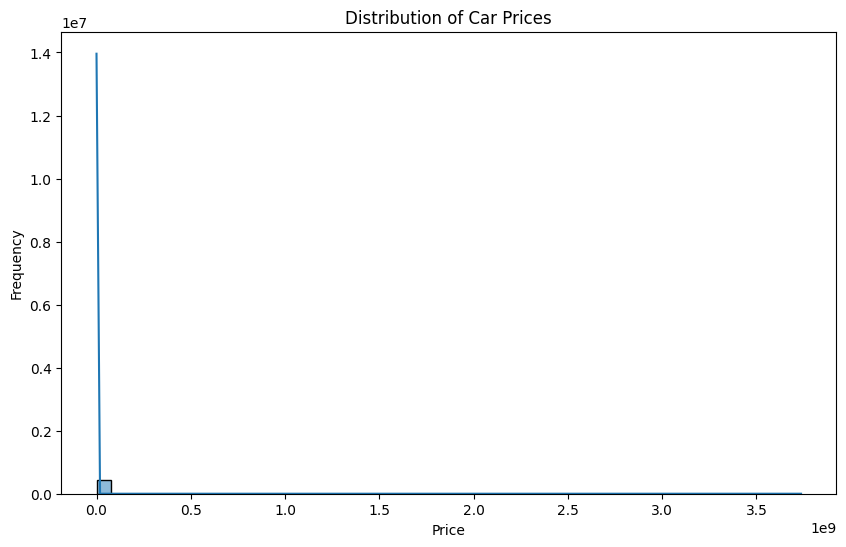

<Figure size 640x480 with 0 Axes>

In [10]:
# Explore distribution of 'price'
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
plt.savefig('images/dist_price.png')

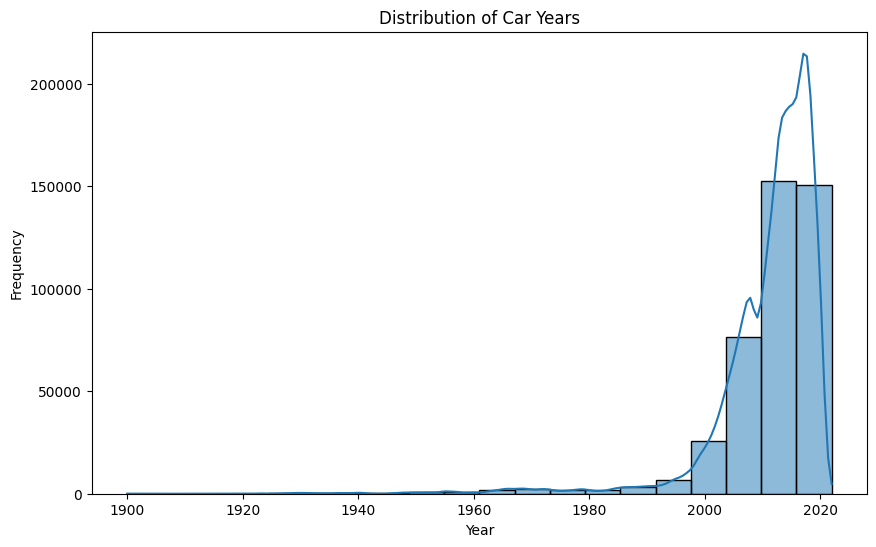

<Figure size 640x480 with 0 Axes>

In [11]:

# Explore distribution of 'year'
plt.figure(figsize=(10, 6))
sns.histplot(df['year'].dropna(), bins=20, kde=True) # Drop NaNs for plotting
plt.title('Distribution of Car Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()
plt.savefig('images/dist_year.png')

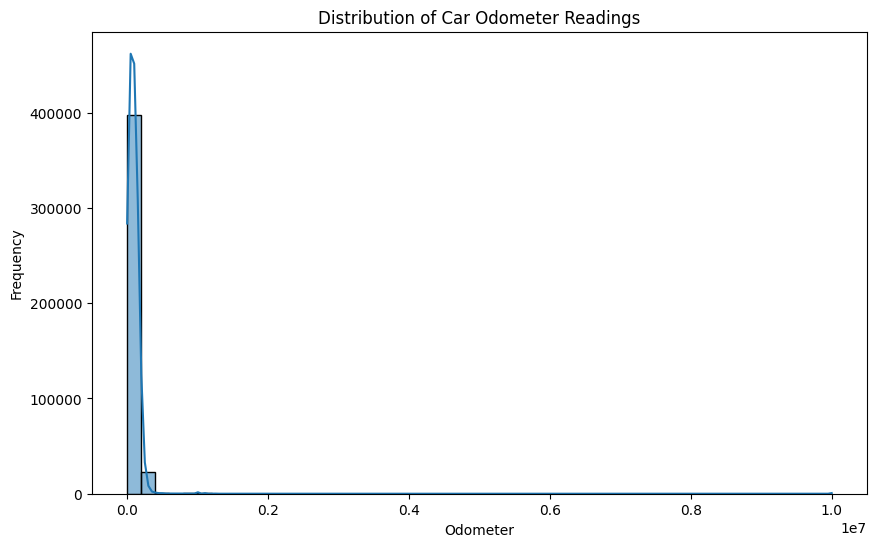

<Figure size 640x480 with 0 Axes>

In [12]:



# Explore distribution of 'odometer'
plt.figure(figsize=(10, 6))
sns.histplot(df['odometer'].dropna(), bins=50, kde=True) # Drop NaNs for plotting
plt.title('Distribution of Car Odometer Readings')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.show()
plt.savefig('images/dist_odometer.png')

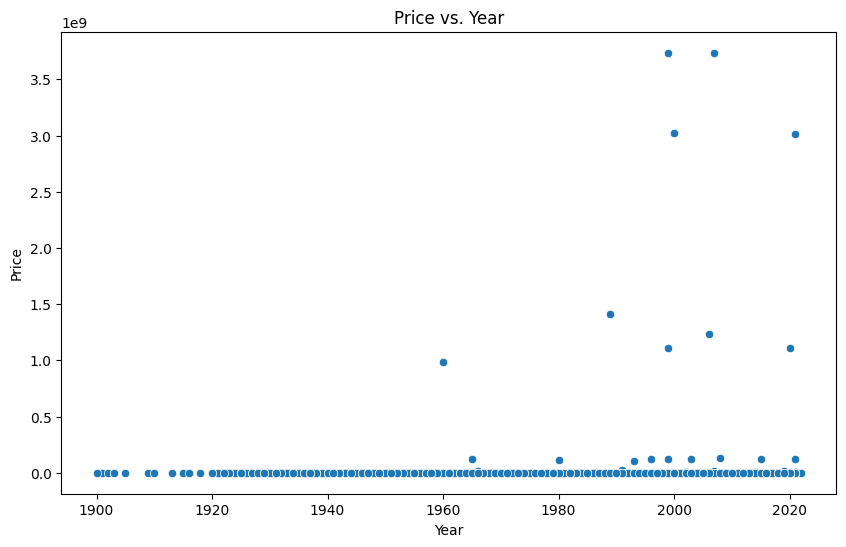

<Figure size 640x480 with 0 Axes>

In [13]:
# Explore the relationship between 'year' and 'price'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='price', data=df.dropna(subset=['year', 'price']))
plt.title('Price vs. Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()
plt.savefig('images/relation_year_price.png')

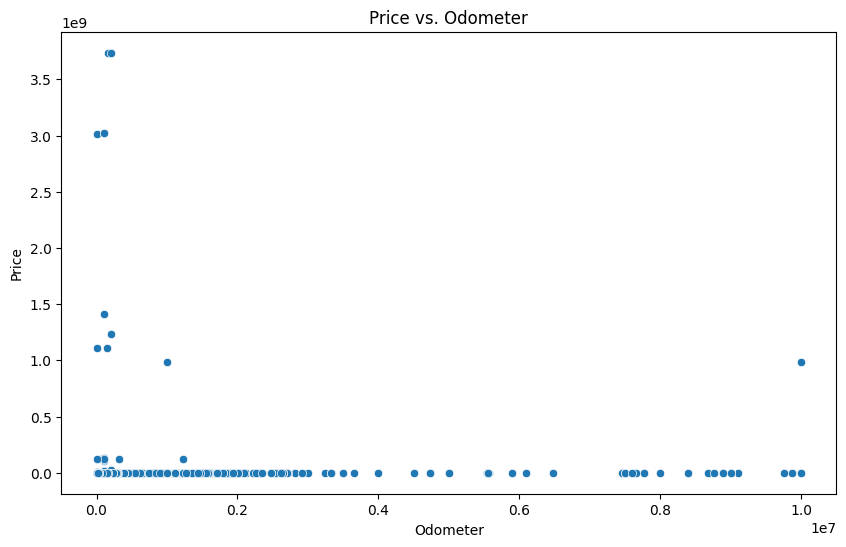

<Figure size 640x480 with 0 Axes>

In [14]:
# Explore the relationship between 'odometer' and 'price'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='odometer', y='price', data=df.dropna(subset=['odometer', 'price']))
plt.title('Price vs. Odometer')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.show()
plt.savefig('images/relation_odometer_price.png')

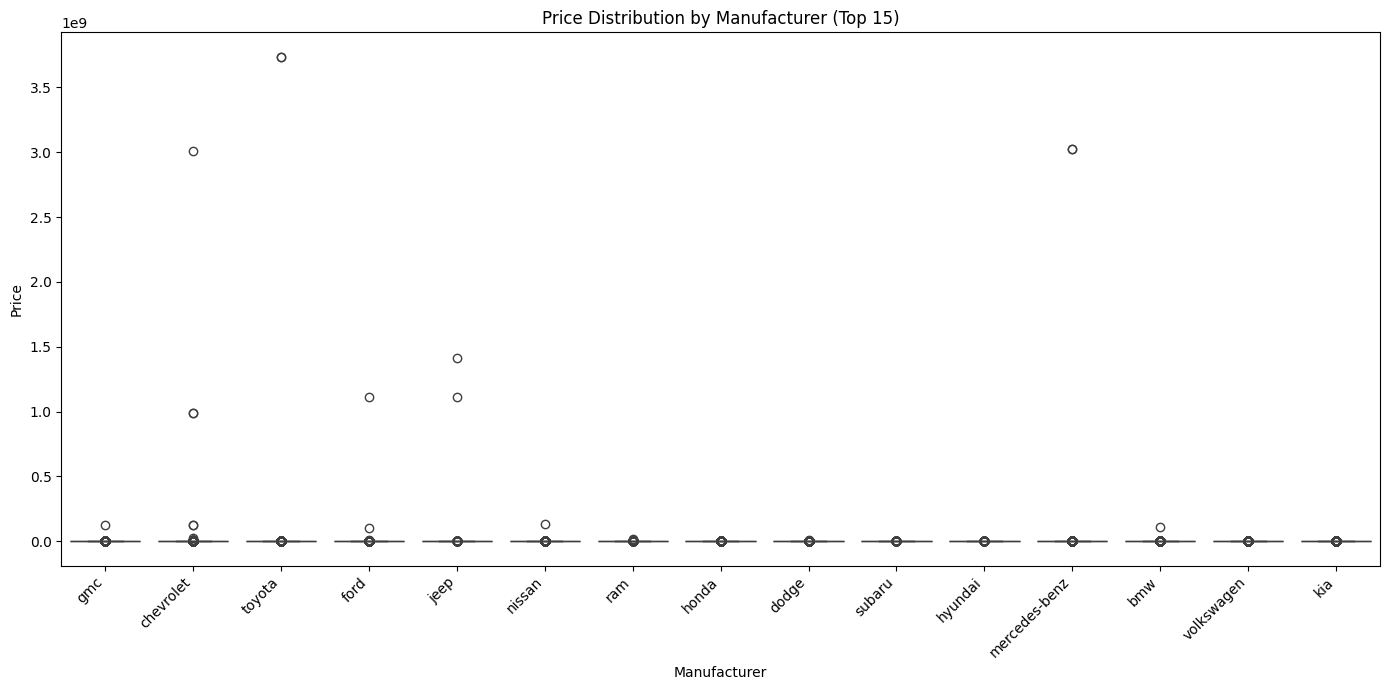

<Figure size 640x480 with 0 Axes>

In [15]:
# Explore the relationship between 'manufacturer' and 'price' (showing top N manufacturers)
plt.figure(figsize=(14, 7))
top_manufacturers = df['manufacturer'].value_counts().nlargest(15).index
sns.boxplot(x='manufacturer', y='price', data=df[df['manufacturer'].isin(top_manufacturers)])
plt.title('Price Distribution by Manufacturer (Top 15)')
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.savefig('images/relation_manif_price.png')

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [16]:
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100
display(missing_percentage)

,0
id,0.000000
region,0.000000
price,0.000000
year,0.282281
manufacturer,4.133714
model,1.236179
condition,40.785232
cylinders,41.622470
fuel,0.705819
odometer,1.030735


In [17]:
# Drop columns with a high percentage of missing values (e.g., > 50%)
cols_to_drop = missing_percentage[missing_percentage > 50].index.tolist()
df.drop(columns=cols_to_drop, inplace=True)

In [18]:


# Impute missing values for remaining columns
# For numerical columns, use the median
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

/tmp/ipython-input-2257577456.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


In [19]:
# For categorical columns, use the mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isnull().any():
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)

/tmp/ipython-input-4123801524.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val, inplace=True)


In [20]:
# Verify that missing values have been handled
display(df.isnull().sum())

,0
id,0
region,0
price,0
year,0
manufacturer,0
model,0
condition,0
cylinders,0
fuel,0
odometer,0


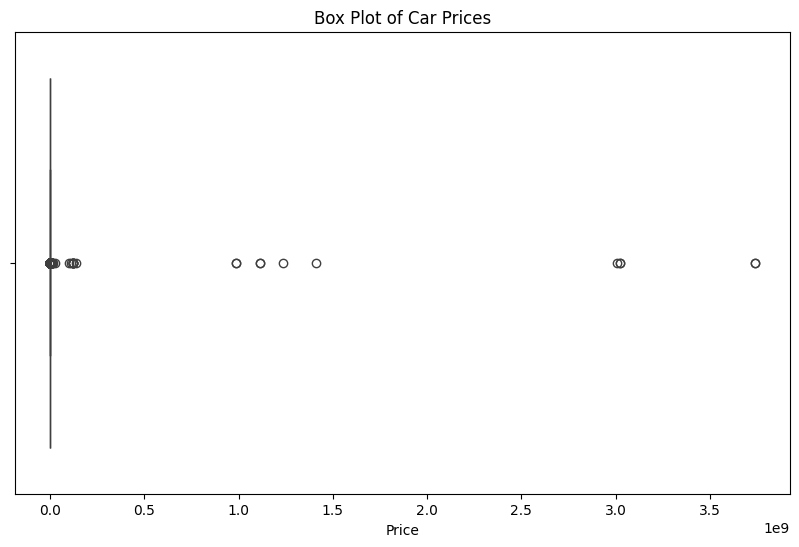

<Figure size 640x480 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot for 'price'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Box Plot of Car Prices')
plt.xlabel('Price')
plt.show()
plt.savefig('images/box_plt_price.png')

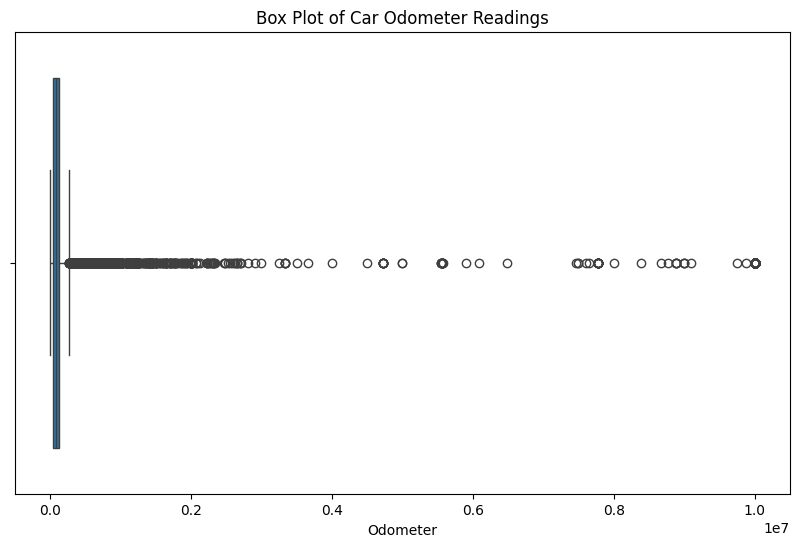

<Figure size 640x480 with 0 Axes>

In [22]:
# Box plot for 'odometer'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['odometer'])
plt.title('Box Plot of Car Odometer Readings')
plt.xlabel('Odometer')
plt.show()
plt.savefig('images/box_plt_odometer.png')

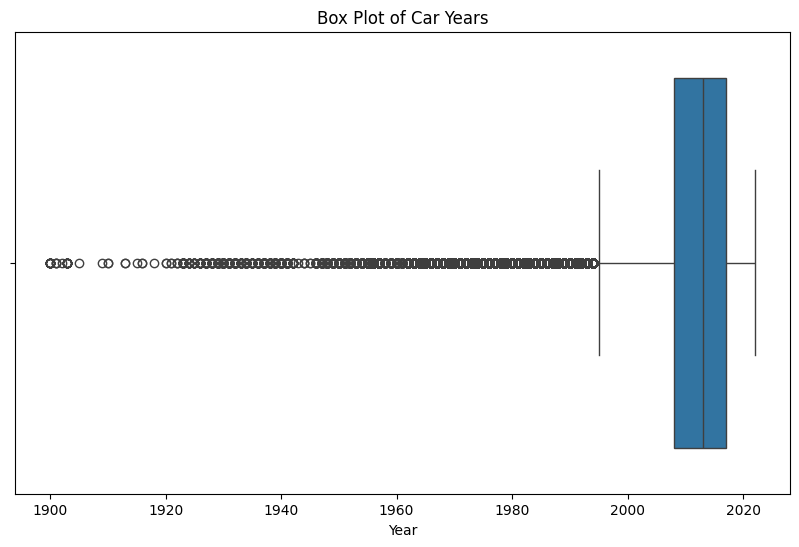

<Figure size 640x480 with 0 Axes>

In [23]:
# Box plot for 'year'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['year'])
plt.title('Box Plot of Car Years')
plt.xlabel('Year')
plt.show()
plt.savefig('images/box_car_year.png')

In [ ]:
# Remove Outlies and also trying to reduce data size, because if moremry issue

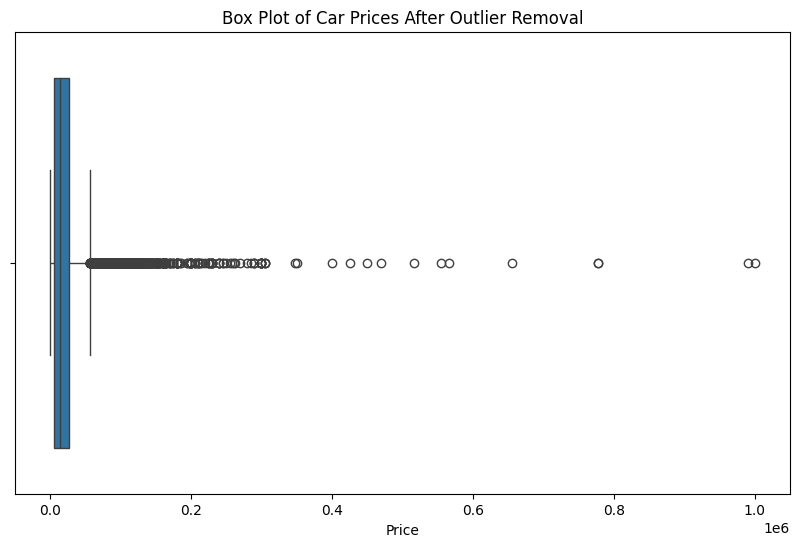

<Figure size 640x480 with 0 Axes>

In [24]:
# Remove rows with price greater than 1,000,000 (assuming prices above this are outliers)
df = df[df['price'] < 1000000]

# Re-examine the distribution of numerical columns after outlier removal
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Box Plot of Car Prices After Outlier Removal')
plt.xlabel('Price')
plt.show()

plt.savefig('images/price_outliner.png')



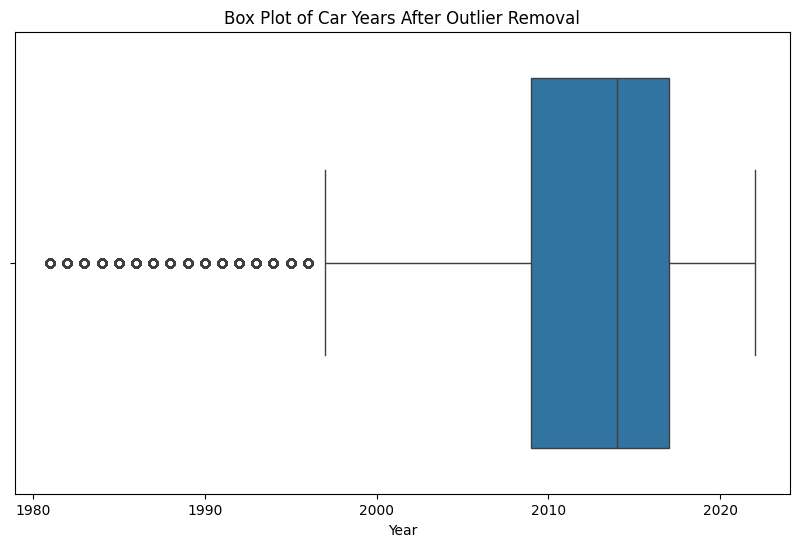

<Figure size 640x480 with 0 Axes>

In [25]:
# Remove rows with year less than 1980 (assuming cars older than this are rare or classic cars not representative of typical used cars)
df = df[df['year'] > 1980]

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['year'])
plt.title('Box Plot of Car Years After Outlier Removal')
plt.xlabel('Year')
plt.show()
plt.savefig('images/box_plt_year_outliner.png')

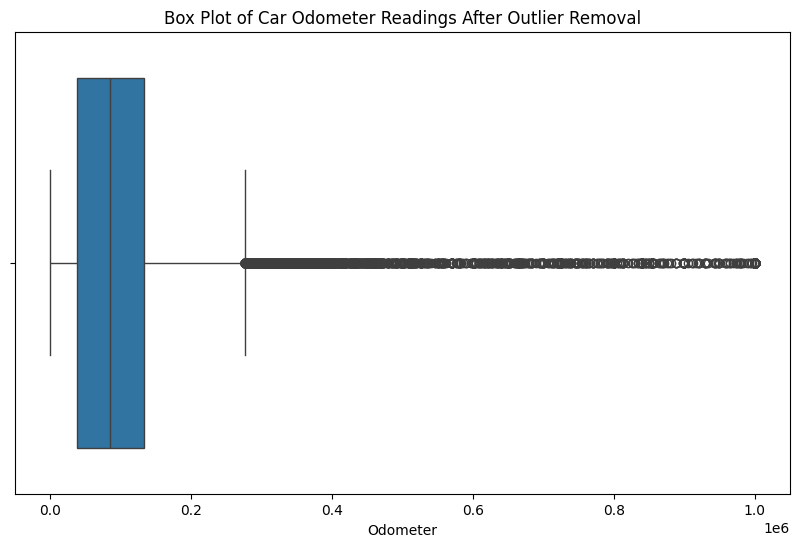

<Figure size 640x480 with 0 Axes>

In [26]:

# Remove rows with odometer greater than 1,000,000 (assuming extremely high mileage is an outlier)
df = df[df['odometer'] < 1000000]

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['odometer'])
plt.title('Box Plot of Car Odometer Readings After Outlier Removal')
plt.xlabel('Odometer')
plt.show()
plt.savefig('images/box_plt_odometer_outliner.png')

In [36]:

# Check the shape of the dataframe after outlier removal
display(df.shape)

(417678, 17)

In [37]:
# Check data types
display(df.dtypes)

# Convert 'year' to integer type as it represents a year
df['year'] = df['year'].astype(int)

# Convert 'odometer' to integer type as it represents mileage
df['odometer'] = df['odometer'].astype(int)

# Verify data types after conversion
display(df.dtypes)

,0
id,int64
region,object
price,int64
year,float64
manufacturer,object
model,object
condition,object
cylinders,object
fuel,object
odometer,float64


,0
id,int64
region,object
price,int64
year,int64
manufacturer,object
model,object
condition,object
cylinders,object
fuel,object
odometer,int64


In [38]:
import datetime

# Get the current year
current_year = datetime.datetime.now().year

# Create 'car_age' feature
df['car_age'] = current_year - df['year']

# Create 'price_per_odometer' feature (handle potential division by zero if odometer is 0)
df['price_per_odometer'] = df['price'] / (df['odometer'] + 1e-6) # Add a small epsilon to avoid division by zero

# Display the first few rows with the new features
display(df[['year', 'car_age', 'odometer', 'price', 'price_per_odometer']].head())

,year,car_age,odometer,price,price_per_odometer
0,2013,12,85548,6000,0.070136
1,2013,12,85548,11900,0.139103
2,2013,12,85548,21000,0.245476
3,2013,12,85548,1500,0.017534
4,2013,12,85548,4900,0.057278


In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
display(f"Categorical columns: {list(categorical_cols)}")

# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows of the DataFrame after one-hot encoding
display(df.head())

# Display the shape of the updated DataFrame
display(df.shape)

"Categorical columns: ['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'VIN', 'drive', 'type', 'paint_color', 'state']"

## Summary:

### Data Analysis Key Findings

* Columns with more than 50% missing values (specifically the 'size' column) were dropped from the dataset.
* Missing numerical values were imputed with the median, and missing categorical values were imputed with the mode.
* Outliers in 'price' (above \$1,000,000), 'year' (before 1980), and 'odometer' (above 1,000,000) were removed, reducing the number of rows from 423,857 to 417,678.
* The data types for 'year' and 'odometer' were converted from float64 to int64.
* Two new features, 'car\_age' and 'price\_per\_odometer', were successfully engineered.
* Categorical features were one-hot encoded, and the first dummy variable was dropped for each category to avoid multicollinearity.
* Logarithmic transformations were applied to 'odometer', 'car\_age', and 'price\_per\_odometer'.
* Standard scaling was applied to the remaining numerical features (excluding 'price').
* The dataset was successfully split into training (80%) and testing (20%) sets.

### Insights

* The comprehensive data preparation process, including handling missing values, outliers, feature engineering, encoding, and scaling, has resulted in a clean and structured dataset ready for machine learning model training.


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [1]:
import pandas as pd
import numpy as np
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('/content/data/vehicles.csv')

# Data Preparation steps from previous successful subtasks:

# Handle missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
cols_to_drop = missing_percentage[missing_percentage > 50].index.tolist()
df.drop(columns=cols_to_drop, inplace=True)

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isnull().any():
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)

# Clean and refine data (outlier removal and type conversion)
df = df[df['price'] < 1000000]
df = df[df['year'] > 1980]
df = df[df['odometer'] < 1000000]

df['year'] = df['year'].astype(int)
df['odometer'] = df['odometer'].astype(int)

# Feature engineering
current_year = datetime.datetime.now().year
df['car_age'] = current_year - df['year']
df['price_per_odometer'] = df['price'] / (df['odometer'] + 1e-6)

# Handle categorical variables (one-hot encoding)
categorical_cols_after_cleaning = df.select_dtypes(include=['object']).columns
high_cardinality_cols = [col for col in categorical_cols_after_cleaning if df[col].nunique() > 1000] # Define a threshold for high cardinality

# Drop high cardinality columns
df.drop(columns=high_cardinality_cols, inplace=True)

# Re-identify categorical columns after dropping high cardinality ones
categorical_cols_for_onehot = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding to remaining categorical columns
df = pd.get_dummies(df, columns=categorical_cols_for_onehot, drop_first=True)


# Apply transformations and scaling
numerical_cols_to_transform = ['odometer', 'car_age', 'price_per_odometer']

for col in numerical_cols_to_transform:
    df[col + '_log'] = np.log1p(df[col])

numerical_cols_for_scaling = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols_for_scaling.remove('price')
numerical_cols_for_scaling = [col for col in numerical_cols_for_scaling if col not in numerical_cols_to_transform]


scaler = StandardScaler()
df[numerical_cols_for_scaling] = scaler.fit_transform(df[numerical_cols_for_scaling])


# Define features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

/tmp/ipython-input-893070480.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
/tmp/ipython-input-893070480.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

(334142, 550)

(83536, 550)

(334142,)

(83536,)

In [3]:
from sklearn.linear_model import LinearRegression, Lasso

# Initialize the models
linear_reg_model = LinearRegression()
# Train the models
linear_reg_model.fit(X_train, y_train)
print("Linear Regression model trained.")


Linear Regression model trained.


In [4]:
# Initialize the models
lasso_reg_model = Lasso()
# Train the models
lasso_reg_model.fit(X_train, y_train)
print("Lasso Regression model trained.")

Lasso Regression model trained.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.107e+13, tolerance: 8.407e+09
  model = cd_fast.enet_coordinate_descent(


In [5]:
# Make predictions on the testing data
y_pred_linear = linear_reg_model.predict(X_test)
print("Predictions made using Linear Regression.")


Predictions made using Linear Regression.


In [6]:

y_pred_lasso = lasso_reg_model.predict(X_test)
print("Predictions made using Lasso Regression.")

Predictions made using Lasso Regression.


In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluate Linear Regression model
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("--- Linear Regression Model Evaluation ---")
print(f"Mean Absolute Error (MAE): {mae_linear:.2f}")
print(f"Mean Squared Error (MSE): {mse_linear:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_linear:.2f}")
print(f"R-squared (R2): {r2_linear:.2f}")
print("-" * 30)

# Evaluate Lasso Regression model
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("--- Lasso Regression Model Evaluation ---")
print(f"Mean Absolute Error (MAE): {mae_lasso:.2f}")
print(f"Mean Squared Error (MSE): {mse_lasso:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso:.2f}")
print(f"R-squared (R2): {r2_lasso:.2f}")
print("-" * 30)

--- Linear Regression Model Evaluation ---
Mean Absolute Error (MAE): 6888.10
Mean Squared Error (MSE): 137655165.23
Root Mean Squared Error (RMSE): 11732.65
R-squared (R2): 0.46
------------------------------
--- Lasso Regression Model Evaluation ---
Mean Absolute Error (MAE): 6753.89
Mean Squared Error (MSE): 132032346.93
Root Mean Squared Error (RMSE): 11490.53
R-squared (R2): 0.49
------------------------------


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation for Linear Regression
cv_scores_linear = cross_val_score(linear_reg_model, X_train, y_train, cv=5, scoring='r2')

print("--- Linear Regression Cross-Validation R-squared ---")
print(f"R-squared scores for each fold: {cv_scores_linear}")
print(f"Mean R-squared: {cv_scores_linear.mean():.2f}")
print(f"Standard Deviation of R-squared: {cv_scores_linear.std():.2f}")
print("-" * 30)

# Perform cross-validation for Lasso Regression
cv_scores_lasso = cross_val_score(lasso_reg_model, X_train, y_train, cv=5, scoring='r2')

print("--- Lasso Regression Cross-Validation R-squared ---")
print(f"R-squared scores for each fold: {cv_scores_lasso}")
print(f"Mean R-squared: {cv_scores_lasso.mean():.2f}")
print(f"Standard Deviation of R-squared: {cv_scores_lasso.std():.2f}")
print("-" * 30)

--- Linear Regression Cross-Validation R-squared ---
R-squared scores for each fold: [0.47899863 0.46957172 0.49193739 0.47635165 0.49080804]
Mean R-squared: 0.48
Standard Deviation of R-squared: 0.01
------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.685e+13, tolerance: 6.713e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.661e+13, tolerance: 6.680e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.697e+13, tolerance: 6.738e

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Based on the evaluation metrics from both the test set and cross-validation, here is a summary of the performance of the Linear Regression and Lasso Regression models:

Linear Regression:

Test Set R-squared: 0.46
Cross-Validation Mean R-squared: 0.48

Lasso Regression:

Test Set R-squared: 0.49
Cross-Validation Mean R-squared: 0.49

Both models show similar performance, with Lasso Regression having slightly higher R-squared values on both the test set and during cross-validation. The convergence warning for the Lasso model suggests that increasing the number of iterations or adjusting regularization might further improve its performance, but based on the current results, Lasso Regression appears to be the slightly better performing model for this dataset.


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

### Deployment

Here's a possible structure for your report:

**1. Executive Summary:** Briefly summarize the project's objective, key findings about car price drivers, and the main recommendations for the dealership.

**2. Business Understanding:** Briefly reiterate the business problem from the dealership's perspective – understanding what drives used car prices to optimize inventory.

**3. Data Understanding:** Provide a high-level overview of the dataset used, including its size and the types of information it contains. Mention any significant data quality issues found (e.g., missing values, outliers) and how they were addressed.

**4. Data Preparation:** Explain the key steps taken to prepare the data for modeling, such as handling missing values, cleaning outliers, feature engineering (e.g., car age, price per odometer), and handling categorical variables. Keep this section concise and focus on the impact of these steps on the data.

**5. Modeling and Evaluation:**
    *   Mention the types of models trained (Linear Regression and Lasso Regression).
    *   Present the key evaluation metrics (R-squared, MAE, RMSE) for the best-performing model (Lasso Regression in this case). Explain what these metrics mean in a way that is understandable to the client (e.g., R-squared represents the proportion of the variance in car prices that the model can explain, while MAE and RMSE indicate the typical error in price predictions).
    *   Discuss the cross-validation results to demonstrate the model's reliability.

**6. Key Drivers of Car Prices:** This is a crucial section for the client. Based on the analysis (especially the coefficients from the Lasso model, if interpretable), discuss which features have the most significant impact on car prices. Examples might include:
    *   Year/Car Age
    *   Odometer reading
    *   Manufacturer
    *   Condition
    *   Other relevant features.
    *   Explain *how* these factors influence price (e.g., newer cars are generally more expensive, higher mileage cars are typically less expensive).

**7. Recommendations:** Provide clear, actionable recommendations to the used car dealership based on your findings. For example:
    *   Focus on acquiring cars with specific characteristics (e.g., newer models, lower mileage, certain manufacturers or conditions) that command higher prices.
    *   Advise on pricing strategies based on the identified key drivers.
    *   Suggest which types of cars might be harder to sell or require more competitive pricing.

**8. Conclusion:** Briefly reiterate the value of the analysis for the dealership and offer potential next steps (e.g., deploying the model for automated pricing, exploring other features, or analyzing specific market segments).